In [171]:
%matplotlib notebook
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import warnings 
import sys
warnings.filterwarnings('ignore')
from h5py import File
import numpy as np

from geoAssembler.PanelView import Calibrate
from geoAssembler.geometry import AGIPD_1MGeometry
#import karabo_data as kd
#from hdf5_virtualise.euxfel_vds import write_combined_file

Get a run with interesting data

In [2]:
run_dir_1 = '/gpfs/exfel/exp/SPB/201831/p900039/proc/r0273'
run_dir_2 = '/gpfs/exfel/exp/SPB/201850/p900051/proc/r0002/'
out_file_1 = os.path.join(os.environ['HOME'], 'r0273_p900039_virtual.cxi')
out_file_2 = os.path.join(os.environ['HOME'], 'r0002_p900051_virtual.cxi')
write_combined_file(run_dir_1, out_file_1)
write_combined_file(run_dir_2, out_file_2)
with File(out_file_1) as f:
    data_1 = f['/entry_1/data_1/data'][12345]
with File(out_file_2) as f:
    data_2 = f['/entry_1/data_1/data'][100:500]
warnings.resetwarnings()

INFO:hdf5_virtualise.euxfel_vds:Reading run /gpfs/exfel/exp/SPB/201831/p900039/proc/r0273 ...
INFO:hdf5_virtualise.euxfel_vds:Making virtual dataset for 156 trains (198425241:198425397)
INFO:hdf5_virtualise.euxfel_vds:176 frames per train
INFO:hdf5_virtualise.euxfel_vds:Pixels in one detector module: (512, 128)
INFO:hdf5_virtualise.euxfel_vds:VDS shape: (27456, 16, 512, 128)
INFO:hdf5_virtualise.euxfel_vds:Checking pulse IDs...
INFO:hdf5_virtualise.euxfel_vds:Mapped 16 chunks
INFO:hdf5_virtualise.euxfel_vds:Filled 100.00% of hyperslab with data
INFO:hdf5_virtualise.euxfel_vds:0 trains have no detector data
INFO:hdf5_virtualise.euxfel_vds:Reading run /gpfs/exfel/exp/SPB/201850/p900051/proc/r0002/ ...


Writing /home/bergeman/r0273_p900039_virtual.cxi...
Written


INFO:hdf5_virtualise.euxfel_vds:Making virtual dataset for 37 trains (245873254:245873291)
INFO:hdf5_virtualise.euxfel_vds:128 frames per train
INFO:hdf5_virtualise.euxfel_vds:Pixels in one detector module: (512, 128)
INFO:hdf5_virtualise.euxfel_vds:VDS shape: (4736, 16, 512, 128)
INFO:hdf5_virtualise.euxfel_vds:Checking pulse IDs...
INFO:hdf5_virtualise.euxfel_vds:Mapped 16 chunks
INFO:hdf5_virtualise.euxfel_vds:Filled 100.00% of hyperslab with data
INFO:hdf5_virtualise.euxfel_vds:0 trains have no detector data


Writing /home/bergeman/r0002_p900051_virtual.cxi...
Written


In [1]:
#data_2 = np.load(os.path.join(os.environ['HOME'],'sax_run.npz'))['data']
data_1 = np.load(os.path.join('nonsax_run.npz'))['data']

Define quad positions so that quadrants are evenly spaced

In [2]:
quad_pos = [ (-540, 610), (-540, -15), (540, -143), (540, 482)]

<IPython.core.display.Javascript object>


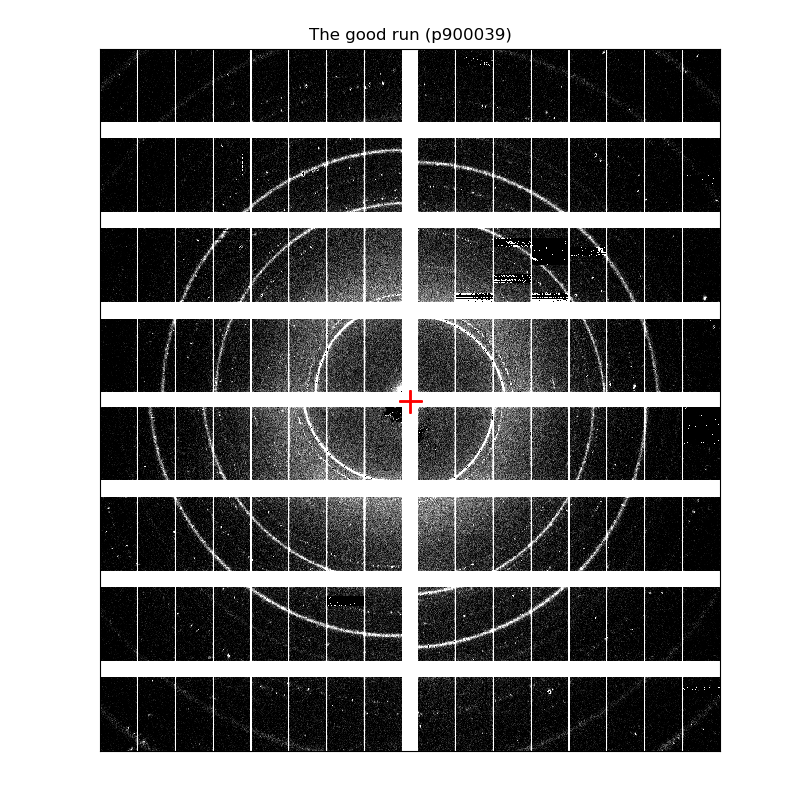

In [12]:
geom_1 = AGIPD_1MGeometry.from_quad_positions(quad_pos)
data, centre = geom_1.position_all_modules(data_1)
cy, cx = centre
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im = ax.imshow(data, vmin=100, vmax=1500, cmap='Greys_r')
ticks = ax.set_xticks([]), ax.set_yticks([])
h1 = ax.hlines(cy, cx-20, cx+20, colors='r', linewidths=1)
h2 = ax.vlines(cx, cy-20, cy+20, colors='r', linewidths=1)
txt = ax.set_title('The good run (p900039)', fontsize=12)
im.set_clim((0, 1500))

In [5]:
geom_2 = AGIPD_1MGeometry.from_quad_positions(quad_pos)
data, centre = geom_2.position_all_modules(data_2[-5])

cy, cx = centre
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im = ax.imshow(data, vmin=1, vmax=50, cmap='Greys_r')
ticks = ax.set_xticks([]), ax.set_yticks([])
h1 = ax.hlines(cy, cx-20, cx+20, colors='r', linewidths=1)
h2 = ax.vlines(cx, cy-20, cy+20, colors='r', linewidths=1)
txt = ax.set_title('The ugly run (p900051)', fontsize=12)

<IPython.core.display.Javascript object>

In [6]:
geom_2 = AGIPD_1MGeometry.from_quad_positions(quad_pos)
data, centre = geom_2.position_all_modules(np.nanmax(data_2, axis=0))

cy, cx = centre
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im = ax.imshow(data, vmin=1, vmax=200, cmap='Greys_r')
ticks = ax.set_xticks([]), ax.set_yticks([])
h1 = ax.hlines(cy, cx-20, cx+20, colors='r', linewidths=1)
h2 = ax.vlines(cx, cy-20, cy+20, colors='r', linewidths=1)
txt = ax.set_title('The not so ugly run (p900051)', fontsize=12)

<IPython.core.display.Javascript object>

In [20]:
clip = Calibrate(data_1)

INFO:PanelView.py: Starting to assemble ... 


In [22]:
geom = AGIPD_1MGeometry.from_quad_positions(quad_pos)
vmin, vmax=1, 200

In [16]:
from ipywidgets import interact, interactive, widget, widgets
from IPython.display import clear_output, display, HTML

<IPython.core.display.Javascript object>


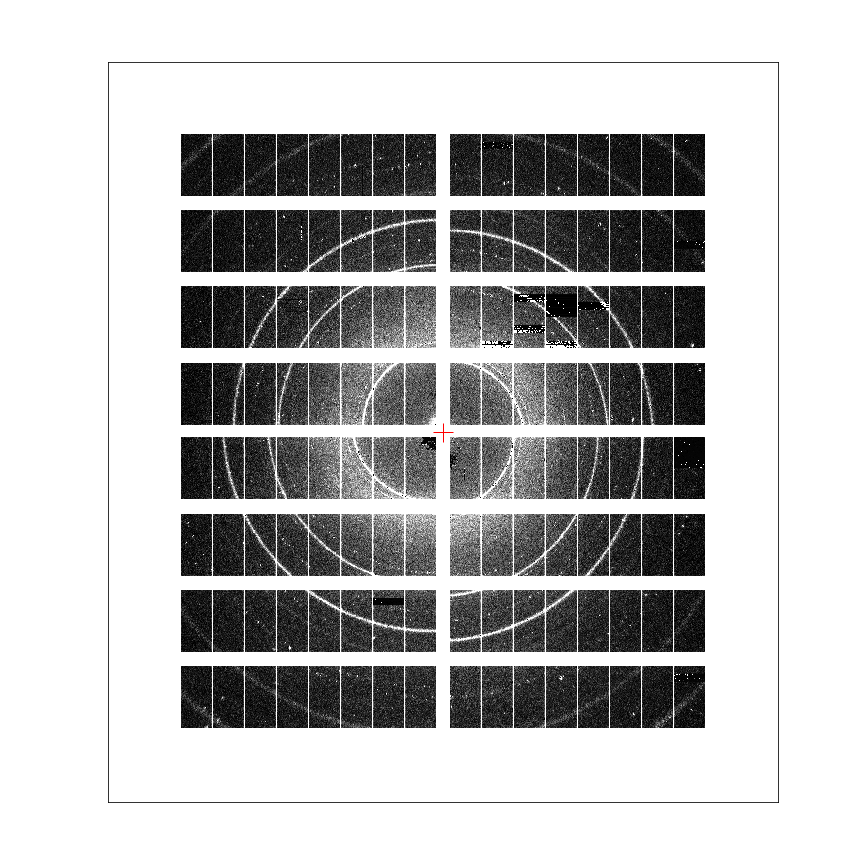

interactive(children=(FloatRangeSlider(value=(100.0, 1500.0), continuous_update=False, description='Boost:', m…

In [264]:
class CalibTab(widgets.Dropdown):
    def __init__(self, parent):
        super(widgets.Dropdown, self).__init__(options=['None', '1', '2', '3','4'],
                                              value='1',
                                              description='Quadrant',
                                              disabled=False)
        self.parent = parent
        self.title = 'Calibration'
    def _set_quad(self, prop):
        '''Select a quadrant''' 
        try:
            pos = str(prop['new']['index'])
            pos={0:None, '1':2, '2':1, '3':4, '4':3}[pos]
        except (KeyError, TypeError):
            try:
                whipe = prop['new']
                if whipe in ('None', 0):
                    try:
                        self.parent.rect.remove()
                        self.parent.quad = None
                    except:
                        pass
            except:
                pass
            return    
        try:
            self.parent.rect.remove()
        except:
            pass
        if pos is None:
            self.parent.rect.remove()
            return
        #self.ax.remove(self.rect) 
        P, dx, dy = self.parent.geom.get_quad_corners(pos, np.array(self.parent.data.shape, dtype='i')//2 )
        self.parent.rect = patches.Rectangle(P, dx, dy, linewidth=2, edgecolor='r', facecolor='none')
        self.parent.ax.add_patch(self.parent.rect)
        self.parent.quad = pos
    
    



%matplotlib notebook
class PanelView(object):
    def __init__(self, geom, raw_data, figsize=(12, 12), vmin=100, vmax=1500, **kwargs):
        self.raw_data = raw_data
        self.data = raw_data
        self.geom = geom
        self.im = None
        self.vmin = vmin
        self.vmax = vmax
        self.figsize = figsize
        self.quad = None
        data, self.centre = self.geom.position_all_modules(self.raw_data)
        self.canvas = np.full(np.array(data.shape) + 300, np.nan)
        d_size = np.array(self.canvas.shape) - np.array(data.shape)
        self.data, self.centre = self.geom.position_all_modules(self.raw_data, canvas=self.canvas.shape)
        
        self._add_widgets()
        self.update_plot(val=(vmin, vmax))
        self.rect = None
        self.sl = interactive(self.update_plot, val=self.val_slider)
        for widget in (self.sl, self.tabs):
            display(widget)
        
    def _add_tabs(self):
        '''Add panel tabs'''
        self.tabs = widgets.Tab()
        self.tabs.children = (CalibTab(self),)
        for i, tab in enumerate(self.tabs.children):
            self.tabs.set_title(i, tab.title)
        self.tabs.children[0].observe(self.tabs.children[0]._set_quad)
        
    def _add_widgets(self):
        '''Add widgets to the layour'''
        #Slider for the max, vmin view
        self.val_slider = widgets.FloatRangeSlider( 
            value=[self.vmin, self.vmax],
            min=self.vmin-1000,
            max=self.vmax+1000,
            step=0.1,
            description='Boost:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d')
        self._add_tabs()


    
    def update_plot(self, val=(100, 1500)):
        if not self.im is None:
            self.im.set_clim(*val)
        else:
            print
            self.data, self.centre = self.geom.position_all_modules(self.raw_data,  canvas=self.canvas.shape)
            cy, cx = self.centre
            fig = plt.figure(figsize=self.figsize)
            self.ax = fig.add_subplot(111)
            #ax = self.ax
            self.im = self.ax.imshow(self.data, vmin=val[0], vmax=val[1], cmap='Greys_r')
            ticks = self.ax.set_xticks([]), self.ax.set_yticks([])
            h1 = self.ax.hlines(cy, cx-20, cx+20, colors='r', linewidths=1)
            h2 = self.ax.vlines(cx, cy-20, cy+20, colors='r', linewidths=1)
            self.cent_cross = (h1, h2)
            fig.subplots_adjust(bottom=0, top=1, hspace=0, wspace=0)
            fig.show()
_ = PanelView(geom, data_1, figsize=(12,12))

In [177]:
PV.rect.remove